<a href="https://colab.research.google.com/github/dongdong-e/Python/blob/master/%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%20%EA%B8%B0%EB%B0%98%EC%9D%98%20%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B5%90%EC%9C%A1/2019_04_05_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn import metrics

import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('Diabetes.csv')

In [0]:
data2 = data[(data['BloodPressure'] != 0) & (data['BMI'] != 0) & (data['Glucose'] != 0)]

In [5]:
data2.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [0]:
feature_name = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']

In [0]:
x = data2[feature_name]
y = data2['Outcome']

In [0]:
logreg = LogisticRegression()

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [13]:
logreg.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
rResult = logreg.predict(xtest)
accuracy = metrics.accuracy_score(ytest, rResult)
accuracy

0.7752293577981652

In [22]:
cross_val_score(logreg, x, y, cv = 10, scoring = 'accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.75342466, 0.76712329, 0.79452055, 0.76712329, 0.73972603,
       0.80555556, 0.77777778, 0.80555556, 0.75      , 0.84507042])

In [23]:
cmData = metrics.confusion_matrix(ytest, rResult)
cmData

array([[123,  21],
       [ 28,  46]])

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

---

## **confusion matrix**

In [54]:
df = pd.read_csv('Temp.csv')
df.head()

,Day,Weather,Temperature,Humidity,Wind,Play?
0,1,Sunny,Hot,High,Weak,No
1,2,Cloudy,Hot,High,Weak,Yes
2,3,Sunny,Mild,Normal,Strong,Yes
3,4,Cloudy,Mild,High,Strong,Yes
4,5,Rainy,Mild,High,Strong,No


* **위처럼 기존 df 데이터 값들은 string으로 되어있으므로, factorize를 사용하여 숫자로 바꿔줘야 함**

In [0]:
df = pd.read_csv('Temp.csv')
df['Weather'],_ = pd.factorize(df['Weather'])
df['Temperature'],_ = pd.factorize(df['Temperature'])
df['Humidity'],_ = pd.factorize(df['Humidity'])
df['Wind'],_ = pd.factorize(df['Wind'])
df['Play?'],_ = pd.factorize(df['Play?'])

In [44]:
df

,Day,Weather,Temperature,Humidity,Wind,Play?
0,1,0,0,0,0,0
1,2,1,0,0,0,1
2,3,0,1,1,1,1
3,4,1,1,0,1,1
4,5,2,1,0,1,0
5,6,2,2,1,1,0
6,7,2,1,0,0,1
7,8,0,0,0,1,0
8,9,1,0,1,0,1
9,10,2,1,0,1,0


In [0]:
feature_name = ['Weather', 'Temperature', 'Humidity', 'Wind']

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


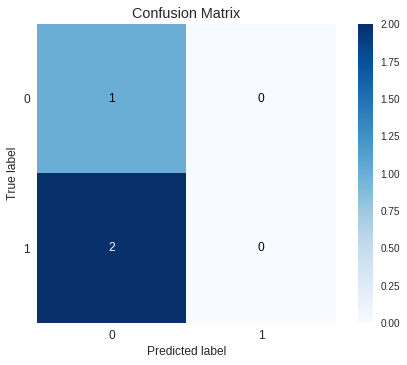

In [53]:
x = df[feature_name]
y = df['Play?']

logreg = LogisticRegression()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

logreg.fit(xtrain, ytrain)

rResult = logreg.predict(xtest)
accuracy = metrics.accuracy_score(ytest, rResult)

cmData = metrics.confusion_matrix(ytest, rResult)

import scikitplot as skplot
t = metrics.confusion_matrix(ytest, rResult)

skplot.metrics.plot_confusion_matrix(ytest, rResult)

---

# **랜덤 포레스트(Random Forest, RF)**

* **(1) 부스팅(Boosting): RF는 Dataset을 나누고 중복된 데이터를 허용한다.**
    * **RF는 Decision Tree(DT)가 Overfitting 상태일 경우 솔루션으로 사용 가능**
* **(2) DT에서는 가장 좋은 질문을 던져서 Dataset을 분류하지만, RF는 질문이 랜덤이기 때문에 좋은 질문이 아닐 수도 있다.**
* **(3) RF는 투표(Aggregating)를 통해서 결과를 예측한다.**

In [0]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# 데이터 로딩
iris = datasets.load_iris()

![대체 텍스트](https://user-images.githubusercontent.com/42408554/55605591-349bd800-57b0-11e9-8746-50fea3a3ae21.png)

![대체 텍스트](https://user-images.githubusercontent.com/42408554/55605538-fa323b00-57af-11e9-9942-b38d74da0163.png)

In [61]:
x = iris.data
y = iris.target.reshape(-1, 1)

x.shape, y.shape
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4)

rdClf = RandomForestClassifier()
rdClf.fit(xtrain, ytrain)
rResult = rdClf.predict(xtest)

metrics.accuracy_score(ytest, rResult)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9833333333333333

---

In [0]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn import metrics

import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('Diabetes.csv', header = 0)

In [0]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1:]

In [69]:
x.shape, y.shape

((768, 8), (768, 1))

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [77]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((537, 8), (231, 8), (537, 1), (231, 1))

In [0]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

classfiers = [('LR', lr), ('KNN', knn), ('DT', dt)]

In [97]:
for clf_name, clf in classfiers:
    clf.fit(xtrain, ytrain)
    rResult = clf.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, rResult)
    print(accuracy)

0.7835497835497836
0.7489177489177489
0.7489177489177489


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [99]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators = classfiers)
vc.fit(xtrain, ytrain)
rResult2 = vc.predict(xtest)
accuracy2 = metrics.accuracy_score(ytest, rResult2)
print(accuracy2)

0.7835497835497836


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
